# Test PCA on soil Attributes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pca import pca

In [2]:
site_slga_data = pd.read_csv('../DATASETS/Soils_and_Landscape_Grid_of_Australia/Output/site_slga_data.csv', index_col = 0)

In [3]:
# Desired Columns: 
columns = [
 'CLY_000_005',
 'CLY_005_015',
 'CLY_015_030',
 'CLY_030_060',
 'CLY_060_100',
 'CLY_100_200',
 'DER_000_999',
 'NTO_000_005',
 'NTO_005_015',
 'NTO_015_030',
 'NTO_030_060',
 'NTO_060_100',
 'NTO_100_200',
 'PTO_000_005',
 'PTO_005_015',
 'PTO_015_030',
 'PTO_030_060',
 'PTO_060_100',
 'SLT_000_005',
 'SLT_005_015',
 'SLT_030_060',
 'SLT_060_100',
 'SLT_100_200',
 'pHc_000_005',
 'pHc_005_015',
 'pHc_015_030',
 'pHc_030_060',
 'pHc_060_100',
 'pHc_100_200']

site_slga_data = site_slga_data[columns]

In [4]:
site_slga_data = site_slga_data.dropna().copy()

In [5]:
site_slga_data.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
NSABHC0015    16.750000    18.500000    22.500000        24.75        26.25   
NSABHC0018    14.666667    16.833334    19.166666        23.00        27.00   
NSABHC0019    16.250000    18.250000    20.000000        23.75        28.00   
NSABHC0020    15.000000    17.000000    22.500000        24.75        27.00   
NSABHC0021    17.750000    21.000000    26.500000        29.00        29.00   

            CLY_100_200  DER_000_999  NTO_000_005  NTO_005_015  NTO_015_030  \
NSABHC0015    37.500000    49.353374     0.045113     0.041196     0.033463   
NSABHC0018    28.333334    36.075130     0.058668     0.053181     0.039478   
NSABHC0019    28.250000    48.759270     0.050166     0.045422     0.034784   
NSABHC0020    30.750000    30.916204     0.052847     0.047825     0.033557   
NSABHC0021    38.000000    37.567870     0.046372     0.042036     0.032747   

            ...  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
NSABHC0015  ...    13.000000        14.75    15.750000    11.000000   
NSABHC0018  ...    12.333333        14.00    15.666667    10.833333   
NSABHC0019  ...    12.750000        14.00    15.750000    11.000000   
NSABHC0020  ...    11.000000        13.00    14.000000    10.000000   
NSABHC0021  ...    13.250000        15.00    15.500000    11.000000   

            pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  \
NSABHC0015     6.778077     6.810408     6.984777     7.166410     7.353638   
NSABHC0018     6.760462     6.850828     7.020003     7.166299     7.340396   
NSABHC0019     6.513579     6.596149     6.790872     7.059542     7.267633   
NSABHC0020     6.771367     6.856721     7.045397     7.198980     7.352275   
NSABHC0021     7.007833     7.095415     7.262317     7.415216     7.571328   

            pHc_100_200  
NSABHC0015     7.423398  
NSABHC0018     7.444081  
NSABHC0019     7.417565  
NSABHC0020     7.446928  
NSABHC0021     7.684584  

[5 rows x 29 columns]

In [6]:
pca_1 = PCA(n_components = 10)

In [7]:
pca_1.fit(site_slga_data)

PCA(n_components=10)

In [8]:
print(pca_1.explained_variance_ratio_)

[6.47184580e-01 3.06191613e-01 1.85317873e-02 1.23363989e-02
 8.43132642e-03 2.64168717e-03 2.13709512e-03 1.01759802e-03
 5.64902365e-04 4.72565111e-04]


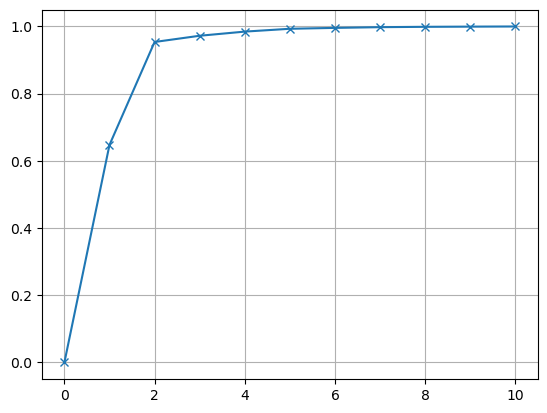

In [9]:
y = np.insert(np.cumsum(pca_1.explained_variance_ratio_), 0, 0)
x = [i for i in range(len(y))]
plt.plot(x, y, marker = 'x')
plt.grid(True)

In [10]:
#pca_1.get_covariance()

Check if using the standard scaler makes a difference:

In [11]:
site_slga_data_std = pd.DataFrame(StandardScaler().fit_transform(site_slga_data), columns = site_slga_data.columns)
pca_2 = PCA(n_components = 10)

In [12]:
pca_2.fit(site_slga_data_std)

PCA(n_components=10)

In [13]:
print(pca_2.explained_variance_ratio_)
print(np.cumsum(pca_2.explained_variance_ratio_))

[0.45275424 0.27957822 0.11431006 0.05295627 0.03619405 0.02514573
 0.01535735 0.00648167 0.00513138 0.00292654]
[0.45275424 0.73233246 0.84664252 0.89959878 0.93579283 0.96093856
 0.97629591 0.98277758 0.98790896 0.9908355 ]


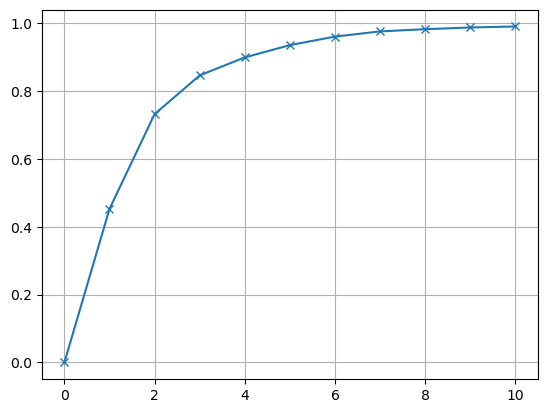

In [14]:
y = np.insert(np.cumsum(pca_2.explained_variance_ratio_), 0, 0)
x = [i for i in range(len(y))]
plt.plot(x, y, marker = 'x')
plt.grid(True)

Without REG

In [15]:
DER_000_999 = site_slga_data['DER_000_999'].values
#DER_000_999

In [16]:
site_slga_data['DER_000_999']

NSABHC0015    49.353374
NSABHC0018    36.075130
NSABHC0019    48.759270
NSABHC0020    30.916204
NSABHC0021    37.567870
                ...    
WAFWAR0008     4.731329
WAFWAR0009     5.439118
WAGCOO0001     9.971666
WAGCOO0002    12.241350
WAGCOO0004    16.202600
Name: DER_000_999, Length: 896, dtype: float64

In [17]:
site_slga_data_reduced =  site_slga_data.drop(columns = ['DER_000_999']).copy()

In [18]:
site_slga_data_reduced.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
NSABHC0015    16.750000    18.500000    22.500000        24.75        26.25   
NSABHC0018    14.666667    16.833334    19.166666        23.00        27.00   
NSABHC0019    16.250000    18.250000    20.000000        23.75        28.00   
NSABHC0020    15.000000    17.000000    22.500000        24.75        27.00   
NSABHC0021    17.750000    21.000000    26.500000        29.00        29.00   

            CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  \
NSABHC0015    37.500000     0.045113     0.041196     0.033463     0.025520   
NSABHC0018    28.333334     0.058668     0.053181     0.039478     0.029264   
NSABHC0019    28.250000     0.050166     0.045422     0.034784     0.026155   
NSABHC0020    30.750000     0.052847     0.047825     0.033557     0.024959   
NSABHC0021    38.000000     0.046372     0.042036     0.032747     0.024532   

            ...  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
NSABHC0015  ...    13.000000        14.75    15.750000    11.000000   
NSABHC0018  ...    12.333333        14.00    15.666667    10.833333   
NSABHC0019  ...    12.750000        14.00    15.750000    11.000000   
NSABHC0020  ...    11.000000        13.00    14.000000    10.000000   
NSABHC0021  ...    13.250000        15.00    15.500000    11.000000   

            pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  \
NSABHC0015     6.778077     6.810408     6.984777     7.166410     7.353638   
NSABHC0018     6.760462     6.850828     7.020003     7.166299     7.340396   
NSABHC0019     6.513579     6.596149     6.790872     7.059542     7.267633   
NSABHC0020     6.771367     6.856721     7.045397     7.198980     7.352275   
NSABHC0021     7.007833     7.095415     7.262317     7.415216     7.571328   

            pHc_100_200  
NSABHC0015     7.423398  
NSABHC0018     7.444081  
NSABHC0019     7.417565  
NSABHC0020     7.446928  
NSABHC0021     7.684584  

[5 rows x 28 columns]

In [19]:
site_slga_data_red_std = pd.DataFrame(StandardScaler().fit_transform(site_slga_data_reduced), columns = site_slga_data_reduced.columns, index = site_slga_data_reduced.index)

In [20]:
site_slga_data_red_std.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
NSABHC0015     0.298739     0.341568     0.436680     0.309716     0.275030   
NSABHC0018     0.044705     0.149671     0.084803     0.137255     0.349619   
NSABHC0019     0.237771     0.312784     0.172773     0.211167     0.449071   
NSABHC0020     0.085350     0.168861     0.436680     0.309716     0.349619   
NSABHC0021     0.420676     0.629414     0.858932     0.728550     0.548522   

            CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  \
NSABHC0015     1.226293    -0.501045    -0.506654    -0.462353    -0.464008   
NSABHC0018     0.301974    -0.353589    -0.342187    -0.315900    -0.310011   
NSABHC0019     0.293571    -0.446074    -0.448666    -0.430181    -0.437884   
NSABHC0020     0.545658    -0.416914    -0.415686    -0.460046    -0.487103   
NSABHC0021     1.276711    -0.487353    -0.495121    -0.479770    -0.504650   

            ...  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
NSABHC0015  ...     1.019251     1.273102     1.413279     0.728989   
NSABHC0018  ...     0.848685     1.076100     1.391360     0.663096   
NSABHC0019  ...     0.955289     1.076100     1.413279     0.728989   
NSABHC0020  ...     0.507553     0.813431     0.952976     0.333629   
NSABHC0021  ...     1.083213     1.338770     1.347522     0.728989   

            pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  \
NSABHC0015     1.200544     1.158543     1.154450     1.093557     1.076048   
NSABHC0018     1.179335     1.205477     1.193346     1.093442     1.062554   
NSABHC0019     0.882069     0.909758     0.940336     0.982326     0.988407   
NSABHC0020     1.192465     1.212319     1.221387     1.127457     1.074659   
NSABHC0021     1.477189     1.489478     1.460913     1.352522     1.297880   

            pHc_100_200  
NSABHC0015     0.990350  
NSABHC0018     1.010827  
NSABHC0019     0.984576  
NSABHC0020     1.013645  
NSABHC0021     1.248929  

[5 rows x 28 columns]

In [21]:
pca_red = PCA(n_components = 10)
pca_red.fit(site_slga_data_red_std)

PCA(n_components=10)

In [22]:
print(pca_red.explained_variance_ratio_)
print(np.cumsum(pca_red.explained_variance_ratio_))

[0.46710941 0.28563357 0.1147825  0.05480204 0.03687628 0.01595909
 0.00673056 0.00533816 0.00305051 0.00264509]
[0.46710941 0.75274297 0.86752548 0.92232752 0.9592038  0.97516289
 0.98189345 0.9872316  0.99028212 0.99292721]


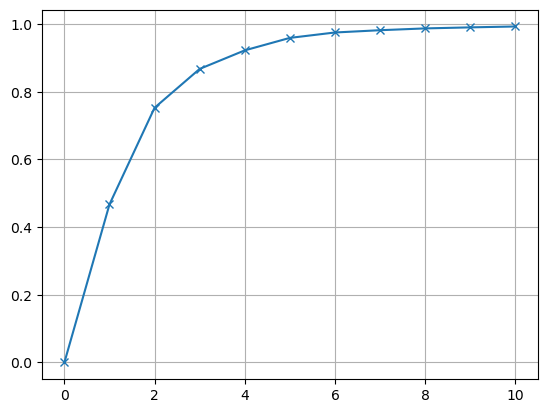

In [23]:
y = np.insert(np.cumsum(pca_red.explained_variance_ratio_), 0, 0)
x = [i for i in range(len(y))]
plt.plot(x, y, marker = 'x')
plt.grid(True)

In [24]:
pca_red = PCA(n_components = 3)
projected_SLGA = pca_red.fit_transform(site_slga_data_red_std)
SLGA_PCA_Processed = pd.DataFrame(projected_SLGA, columns = ['SLGA_1', 'SLGA_2', 'SLGA_3'], index = site_slga_data_red_std.index)

In [25]:
SLGA_PCA_Processed.head()

SLGA_1    SLGA_2    SLGA_3
NSABHC0015  0.782809  3.857307  0.374882
NSABHC0018  0.892029  3.232331  1.269504
NSABHC0019  0.342277  3.225457  0.042503
NSABHC0020 -0.391066  3.294304  0.397392
NSABHC0021  1.006376  4.634101  0.568124

In [26]:
SLGA_PCA_Processed_Export = SLGA_PCA_Processed.copy()
SLGA_PCA_Processed_Export['DER_000_999'] = DER_000_999
SLGA_PCA_Processed_Export.to_csv('../DATASETS/Soils_and_Landscape_Grid_of_Australia/Output/SGLA_PCA_3.csv')

In [27]:
SLGA_PCA_Processed_Export.head()

SLGA_1    SLGA_2    SLGA_3  DER_000_999
NSABHC0015  0.782809  3.857307  0.374882    49.353374
NSABHC0018  0.892029  3.232331  1.269504    36.075130
NSABHC0019  0.342277  3.225457  0.042503    48.759270
NSABHC0020 -0.391066  3.294304  0.397392    30.916204
NSABHC0021  1.006376  4.634101  0.568124    37.567870

<Axes: xlabel='SLGA_1', ylabel='SLGA_2'>

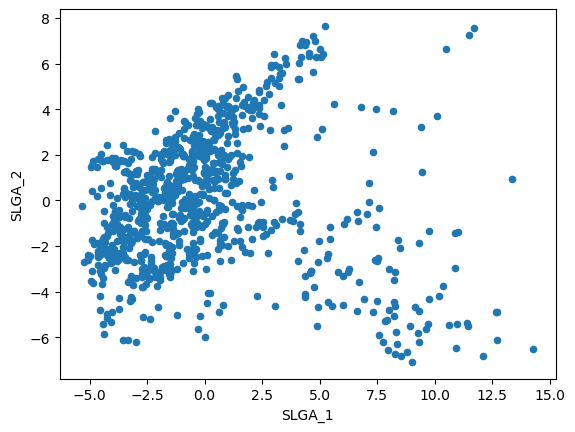

In [28]:
SLGA_PCA_Processed.plot.scatter(x = 'SLGA_1', y = 'SLGA_2')

<Axes: xlabel='SLGA_2', ylabel='SLGA_3'>

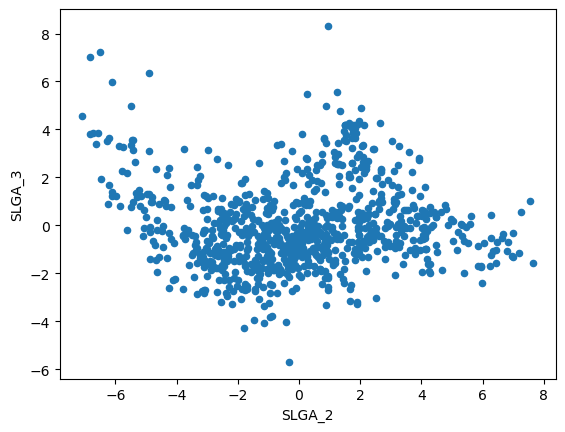

In [29]:
SLGA_PCA_Processed.plot.scatter(x = 'SLGA_2', y = 'SLGA_3')

<Axes: xlabel='SLGA_1', ylabel='SLGA_3'>

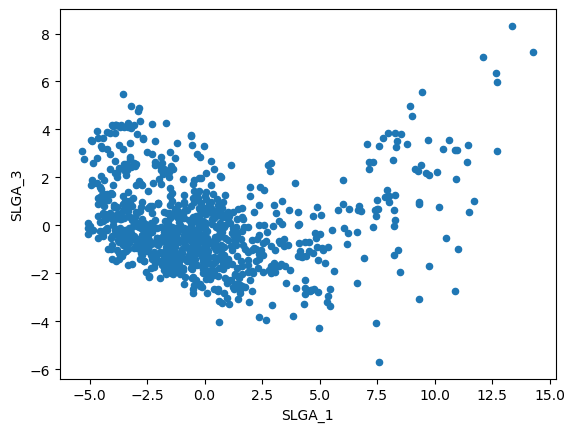

In [30]:
SLGA_PCA_Processed.plot.scatter(x = 'SLGA_1', y = 'SLGA_3')

In [31]:
SLGA_PCA_Processed_reversed = pd.DataFrame(pca_red.inverse_transform(SLGA_PCA_Processed), columns = site_slga_data_red_std.columns, index = site_slga_data_red_std.index)
SLGA_PCA_Processed_reversed.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
NSABHC0015     0.891678     0.888236     0.869692     0.731061     0.599500   
NSABHC0018     0.691383     0.684926     0.657097     0.516218     0.398868   
NSABHC0019     0.715098     0.712574     0.699018     0.586823     0.477637   
NSABHC0020     0.553236     0.547108     0.523530     0.388711     0.270541   
NSABHC0021     1.071324     1.066847     1.043284     0.874183     0.715430   

            CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  \
NSABHC0015     0.713174    -0.498374    -0.480069    -0.432145    -0.394825   
NSABHC0018     0.486346    -0.249516    -0.229546    -0.168894    -0.125132   
NSABHC0019     0.579221    -0.514899    -0.501574    -0.468911    -0.441001   
NSABHC0020     0.386004    -0.633981    -0.620913    -0.585354    -0.551395   
NSABHC0021     0.850390    -0.570441    -0.547778    -0.487438    -0.441099   

            ...  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
NSABHC0015  ...     0.767306     0.817050     0.822256     0.531239   
NSABHC0018  ...     0.554152     0.572785     0.587840     0.310932   
NSABHC0019  ...     0.616426     0.669139     0.672657     0.432174   
NSABHC0020  ...     0.426602     0.487357     0.502326     0.222504   
NSABHC0021  ...     0.918443     0.974676     0.981919     0.629201   

            pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  \
NSABHC0015     1.135214     1.137379     1.141900     1.135902     1.124868   
NSABHC0018     1.168680     1.166696     1.164844     1.155104     1.138718   
NSABHC0019     0.908700     0.912045     0.917868     0.915182     0.909392   
NSABHC0020     1.079870     1.083419     1.088776     1.087633     1.083838   
NSABHC0021     1.387453     1.389518     1.394187     1.386251     1.371904   

            pHc_100_200  
NSABHC0015     1.113695  
NSABHC0018     1.111119  
NSABHC0019     0.907372  
NSABHC0020     1.082277  
NSABHC0021     1.355910  

[5 rows x 28 columns]

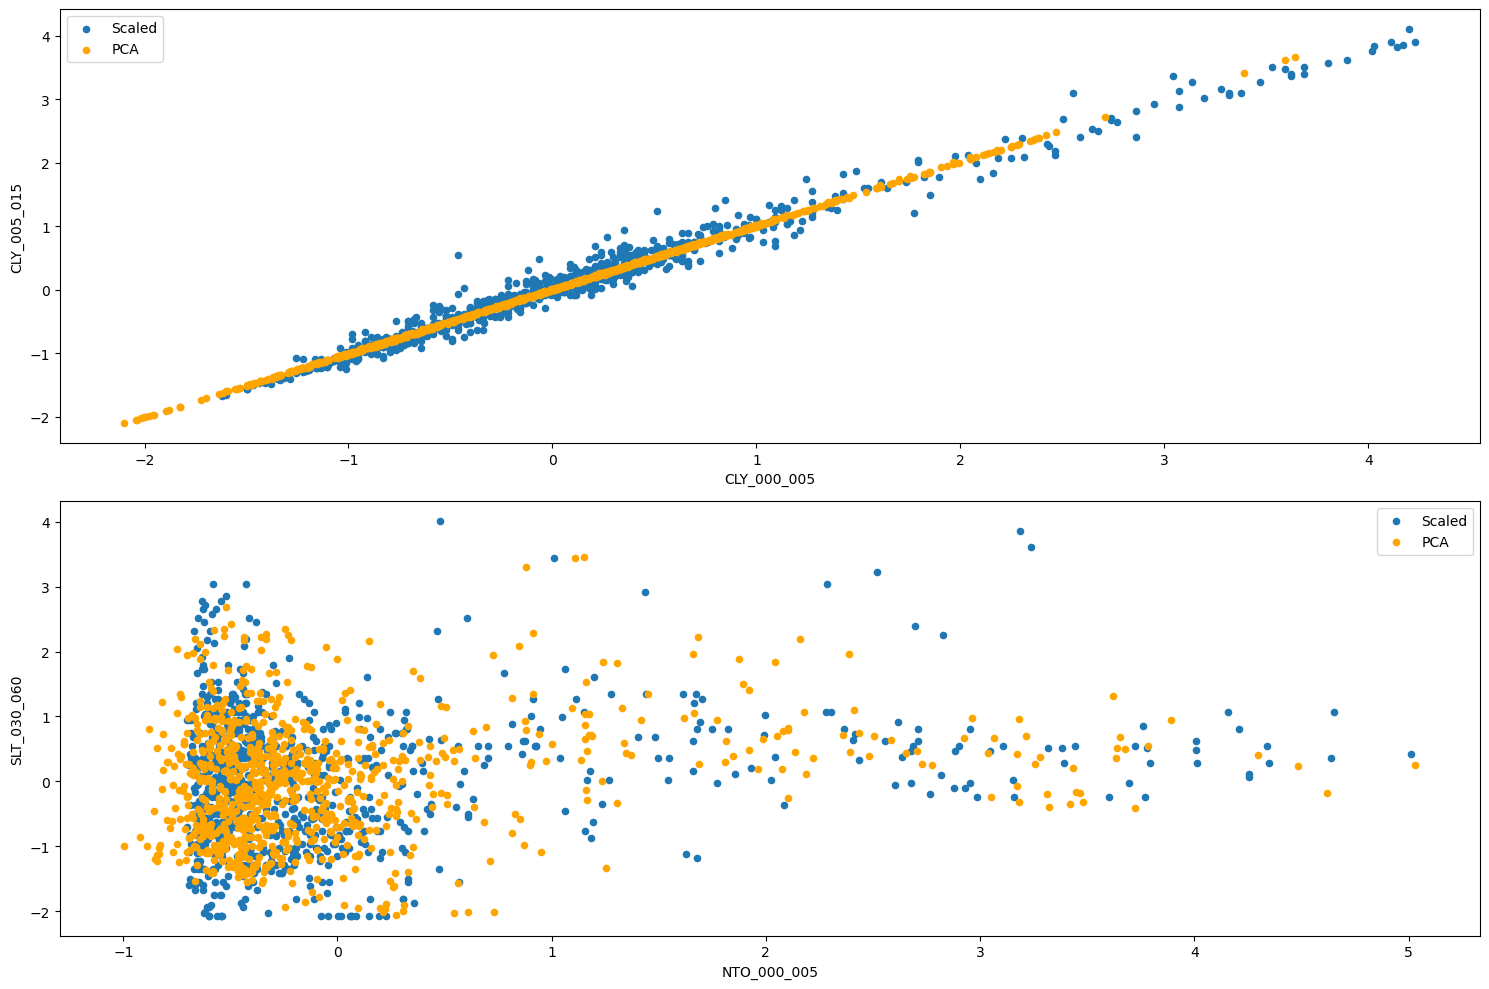

In [32]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))

site_slga_data_red_std.plot.scatter(x ='CLY_000_005', y = 'CLY_005_015', ax = ax[0], label = 'Scaled')
SLGA_PCA_Processed_reversed.plot.scatter(x ='CLY_000_005',y = 'CLY_005_015', ax = ax[0], color = 'orange', label = 'PCA')

site_slga_data_red_std.plot.scatter(x ='NTO_000_005', y = 'SLT_030_060', ax = ax[1], label = 'Scaled')
SLGA_PCA_Processed_reversed.plot.scatter(x ='NTO_000_005',y = 'SLT_030_060', ax = ax[1], color = 'orange', label = 'PCA')
fig.tight_layout()


In [33]:
component_importances = pd.DataFrame(np.abs(pca_red.components_), columns = site_slga_data_red_std.columns, index = [1,2,3])

In [34]:
component_importances.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
1     0.188915     0.191603     0.197858     0.211230     0.216084   
2     0.203042     0.202033     0.197356     0.161537     0.127284   
3     0.105107     0.109511     0.123920     0.153088     0.161725   

   CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  ...  \
1     0.198464     0.205745     0.208471     0.214985     0.213987  ...   
2     0.160698     0.183118     0.179331     0.170157     0.161574  ...   
3     0.165513     0.125129     0.129301     0.149142     0.162461  ...   

   SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  pHc_000_005  \
1     0.205367     0.186701     0.177747     0.204271     0.086007   
2     0.171214     0.189794     0.191659     0.114829     0.287576   
3     0.143726     0.163242     0.149838     0.190978     0.248807   

   pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  pHc_100_200  
1     0.087867     0.089677     0.093719     0.099471     0.108238  
2     0.288856     0.290926     0.290574     0.289469     0.289996  
3     0.245290     0.239834     0.235898     0.229846     0.212924  

[3 rows x 28 columns]

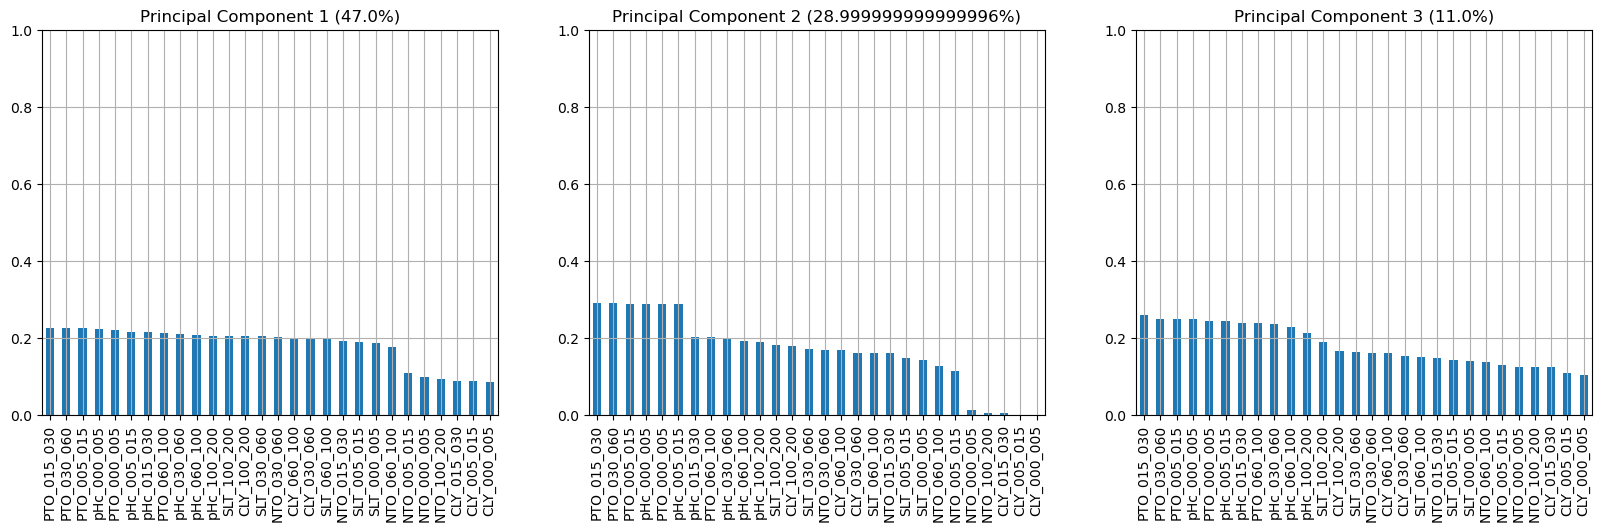

In [35]:
fig, ax = plt.subplots(1,3, figsize = (20,5), sharex = True)
for i in range(1, len(component_importances) + 1):
    principal_importances = component_importances.iloc[i - 1,].sort_values(ascending = False)
    principal_importances.plot.bar(ax = ax[i - 1], ylim = (0, 1), title = f'Principal Component {i} ({round(pca_red.explained_variance_ratio_[i-1],2)*100}%)')
    ax[i-1].grid(True)

In [36]:
len(component_importances)

3

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [28] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [28] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [97.51%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

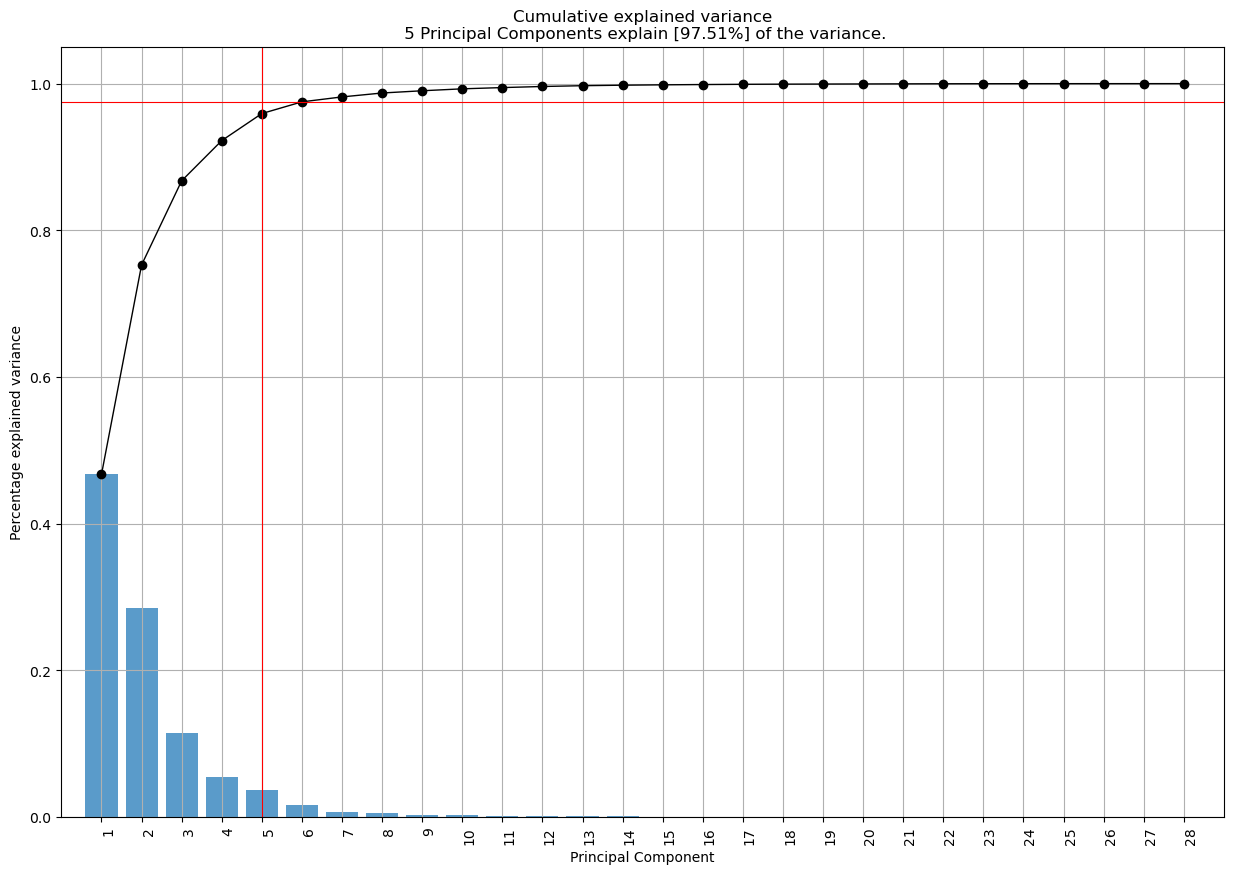

In [37]:
model = pca()
results = model.fit_transform(site_slga_data_red_std)
model.plot()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.51%] of the variance'}, xlabel='PC1 (46.7% expl.var)', ylabel='PC2 (28.5% expl.var)'>)

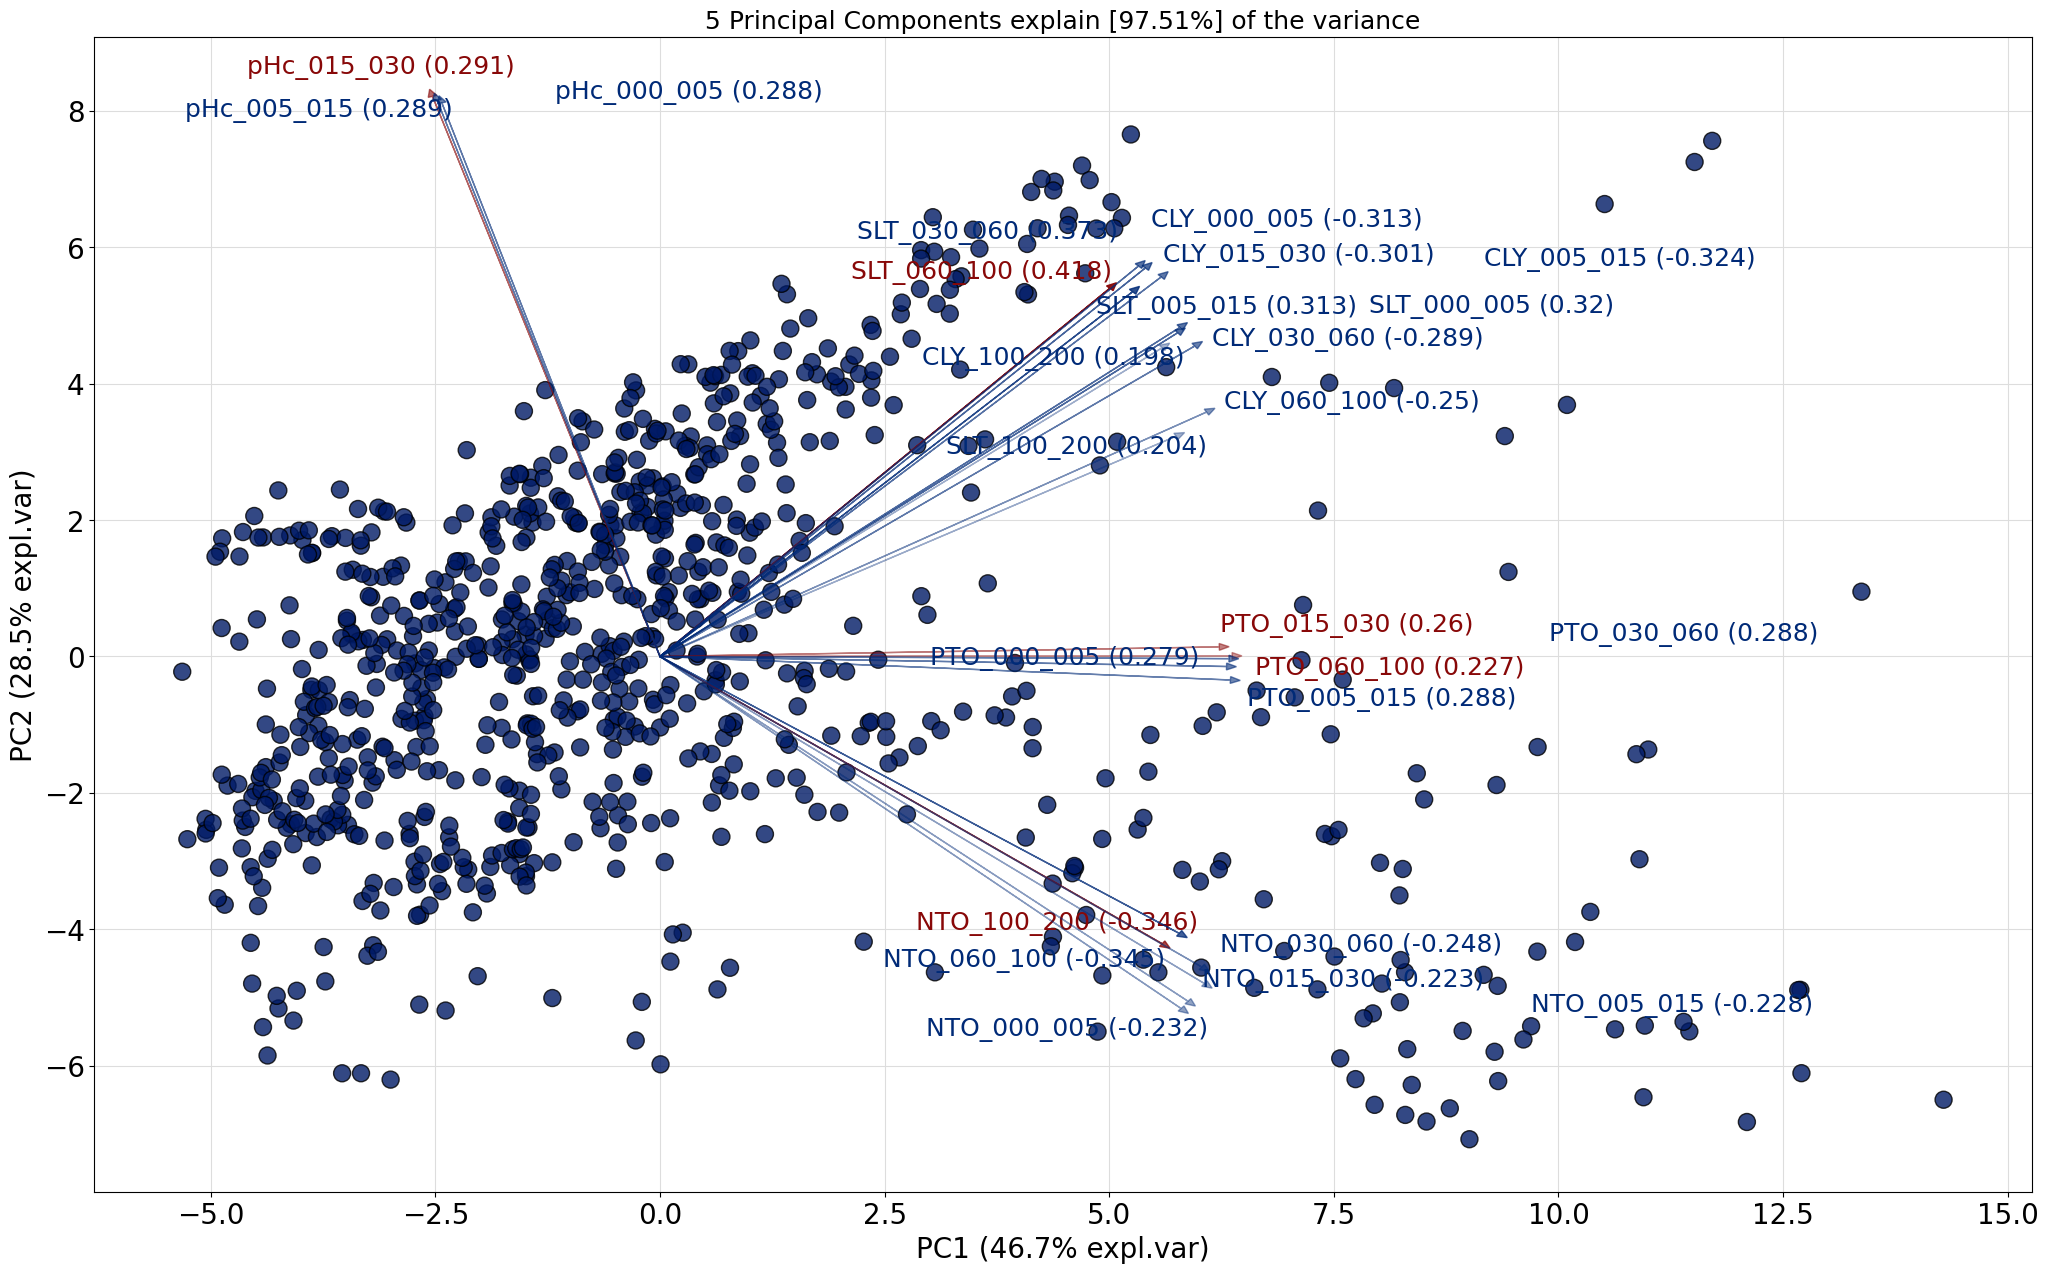

In [38]:
model.biplot()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.51%] of the variance'}, xlabel='PC2 (28.5% expl.var)', ylabel='PC3 (11.4% expl.var)'>)

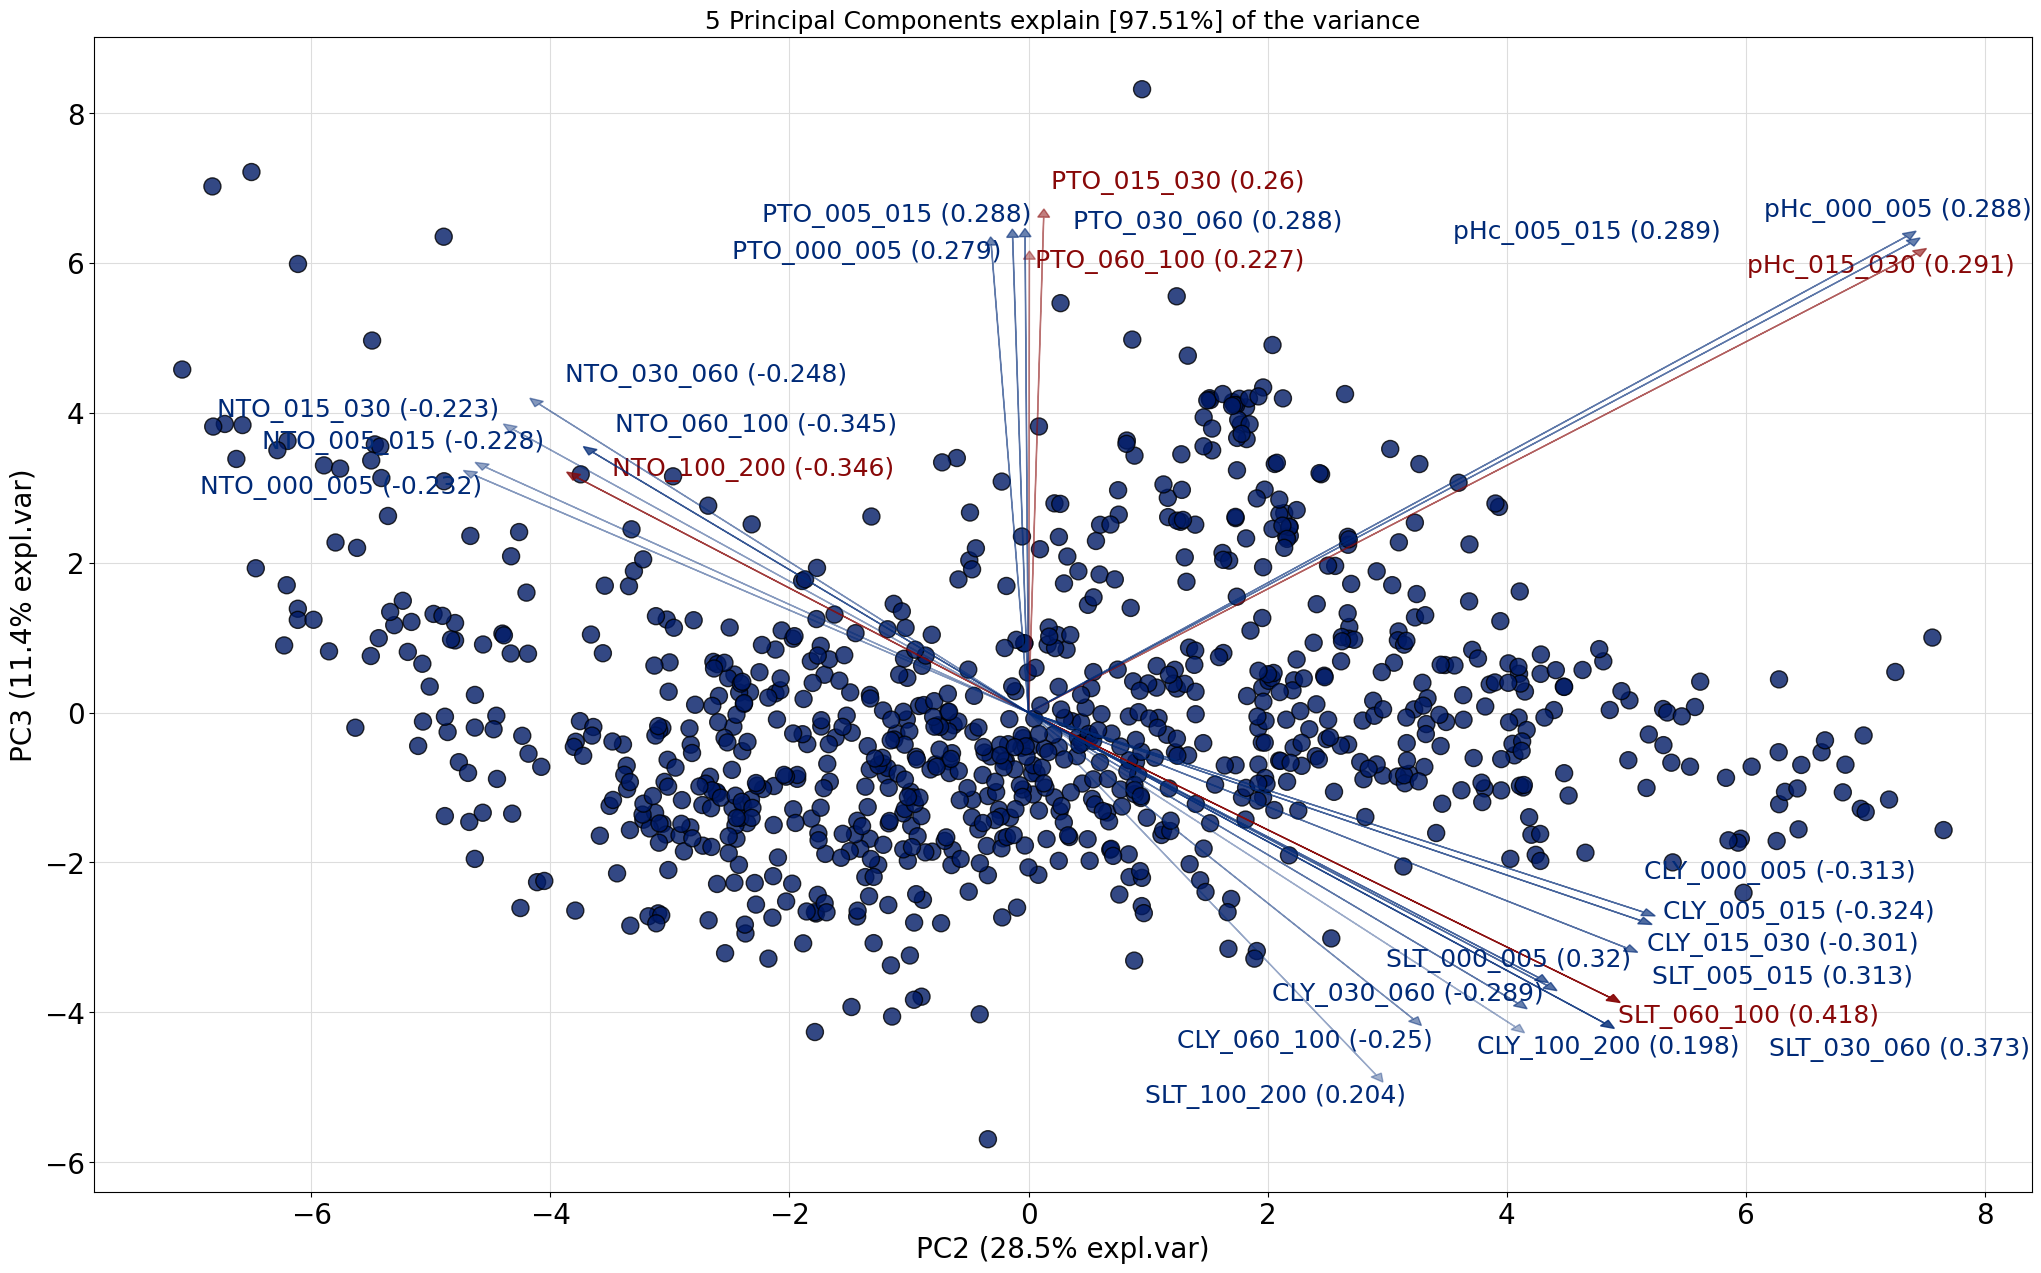

In [39]:
model.biplot(PC = [1,2])

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.51%] of the variance'}, xlabel='PC1 (46.7% expl.var)', ylabel='PC3 (11.4% expl.var)'>)

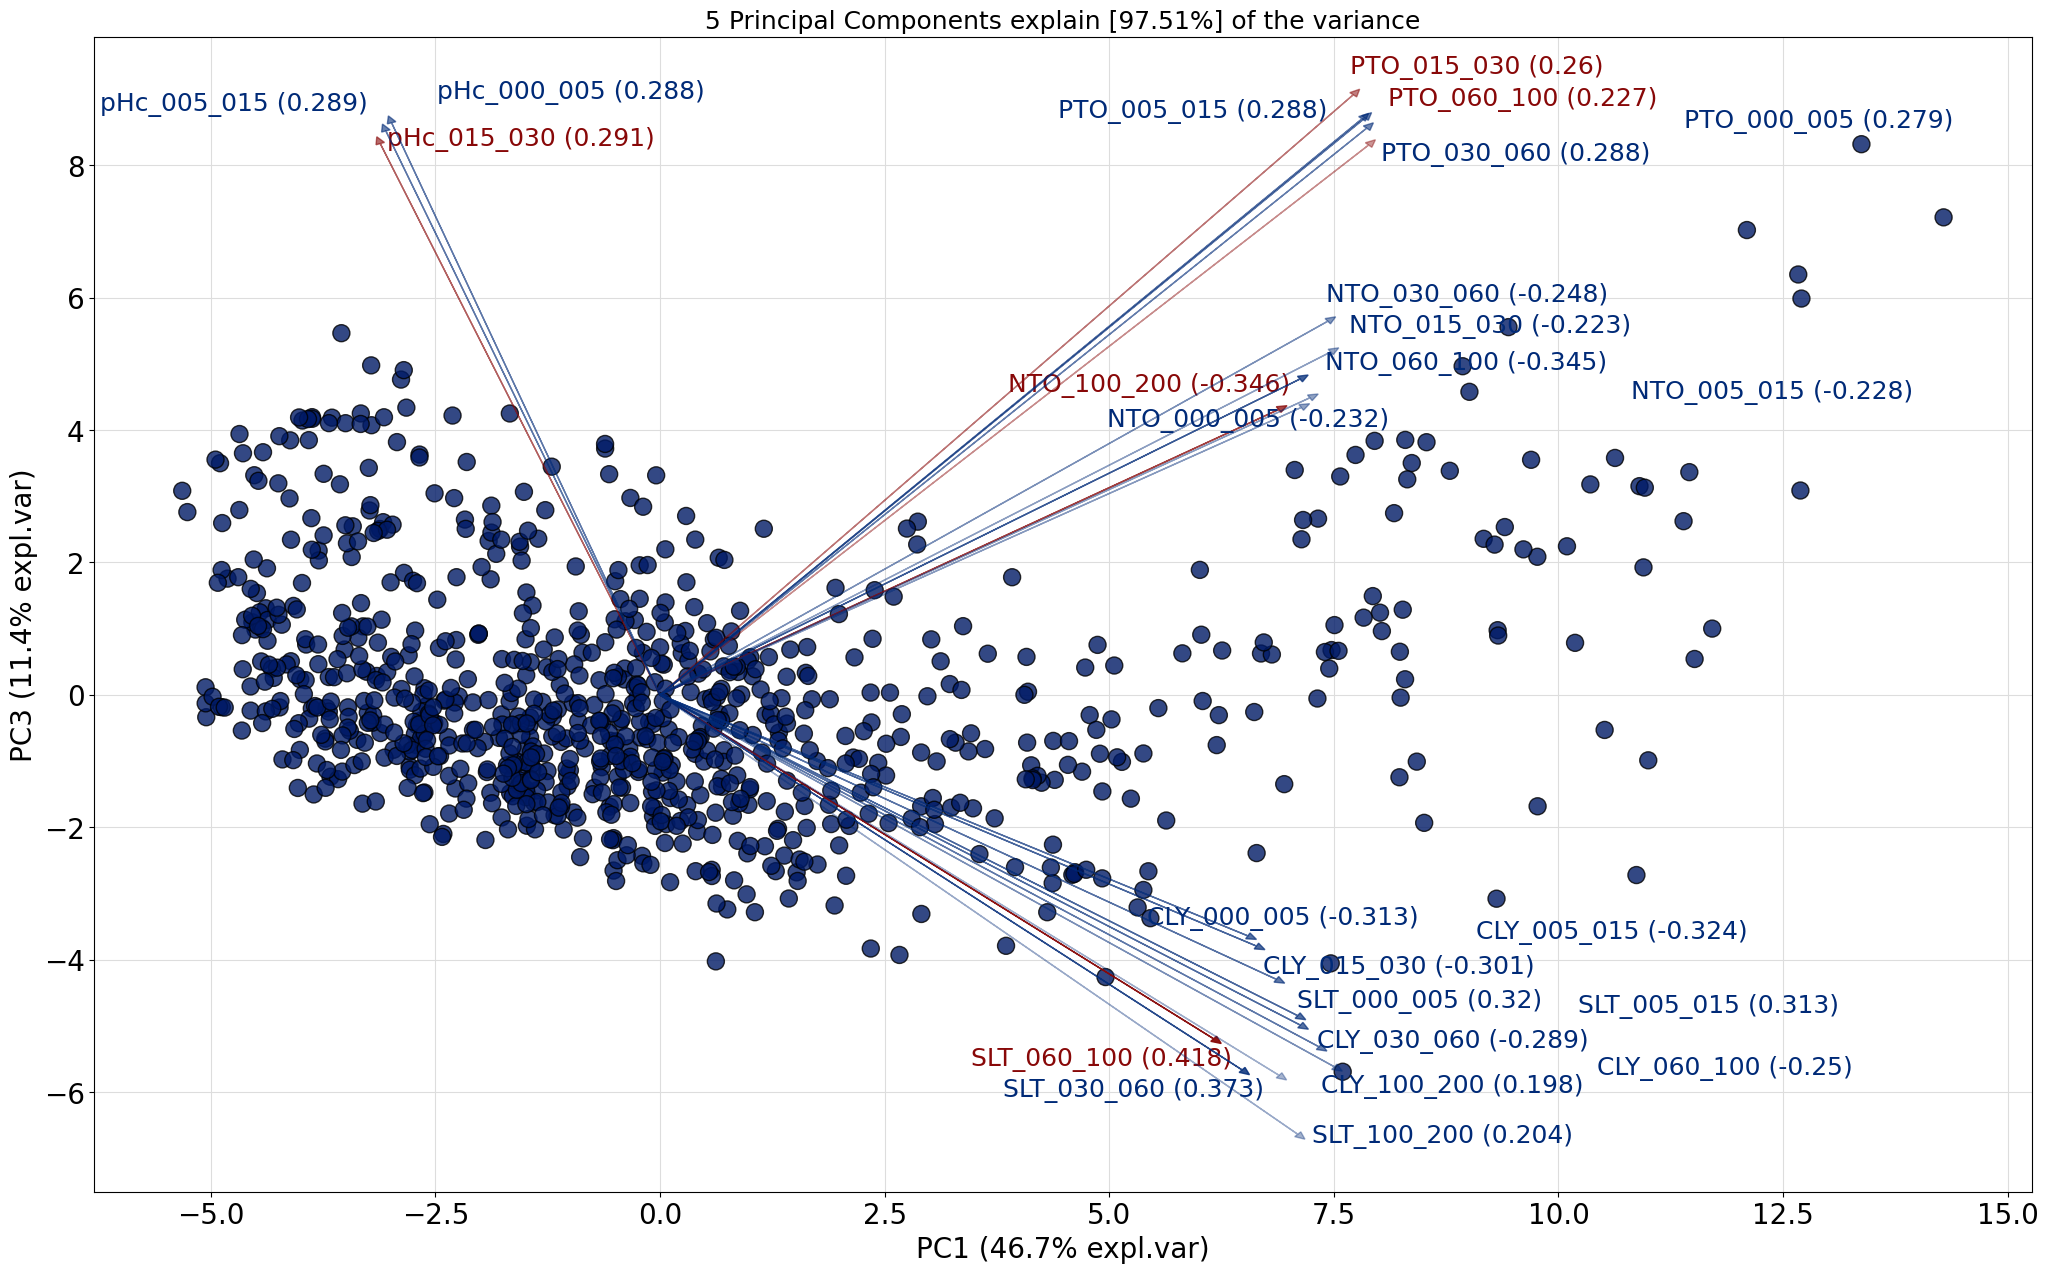

In [40]:
model.biplot(PC = [0,2])

In [41]:
print(model.results['topfeat'])

     PC      feature   loading  type
0   PC1  PTO_060_100  0.226580  best
1   PC2  pHc_015_030  0.290926  best
2   PC3  PTO_015_030  0.260273  best
3   PC4  NTO_100_200 -0.345883  best
4   PC5  SLT_060_100  0.417995  best
5   PC5  CLY_000_005 -0.312595  weak
6   PC5  CLY_005_015 -0.324438  weak
7   PC5  CLY_015_030 -0.300880  weak
8   PC5  CLY_030_060 -0.288850  weak
9   PC5  CLY_060_100 -0.249677  weak
10  PC1  CLY_100_200  0.198464  weak
11  PC4  NTO_000_005 -0.231813  weak
12  PC4  NTO_005_015 -0.227877  weak
13  PC4  NTO_015_030 -0.223165  weak
14  PC4  NTO_030_060 -0.248144  weak
15  PC4  NTO_060_100 -0.344833  weak
16  PC4  PTO_000_005  0.279270  weak
17  PC4  PTO_005_015  0.287853  weak
18  PC4  PTO_030_060  0.287723  weak
19  PC5  SLT_000_005  0.319549  weak
20  PC5  SLT_005_015  0.313380  weak
21  PC5  SLT_030_060  0.373402  weak
22  PC1  SLT_100_200  0.204271  weak
23  PC2  pHc_000_005  0.287576  weak
24  PC2  pHc_005_015  0.288856  weak
25  PC2  pHc_030_060  0.290574  weak
2

[scatterd] >INFO> Add density layer


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.51%] of the variance'}, xlabel='PC1 (46.7% expl.var)', ylabel='PC2 (28.5% expl.var)'>)

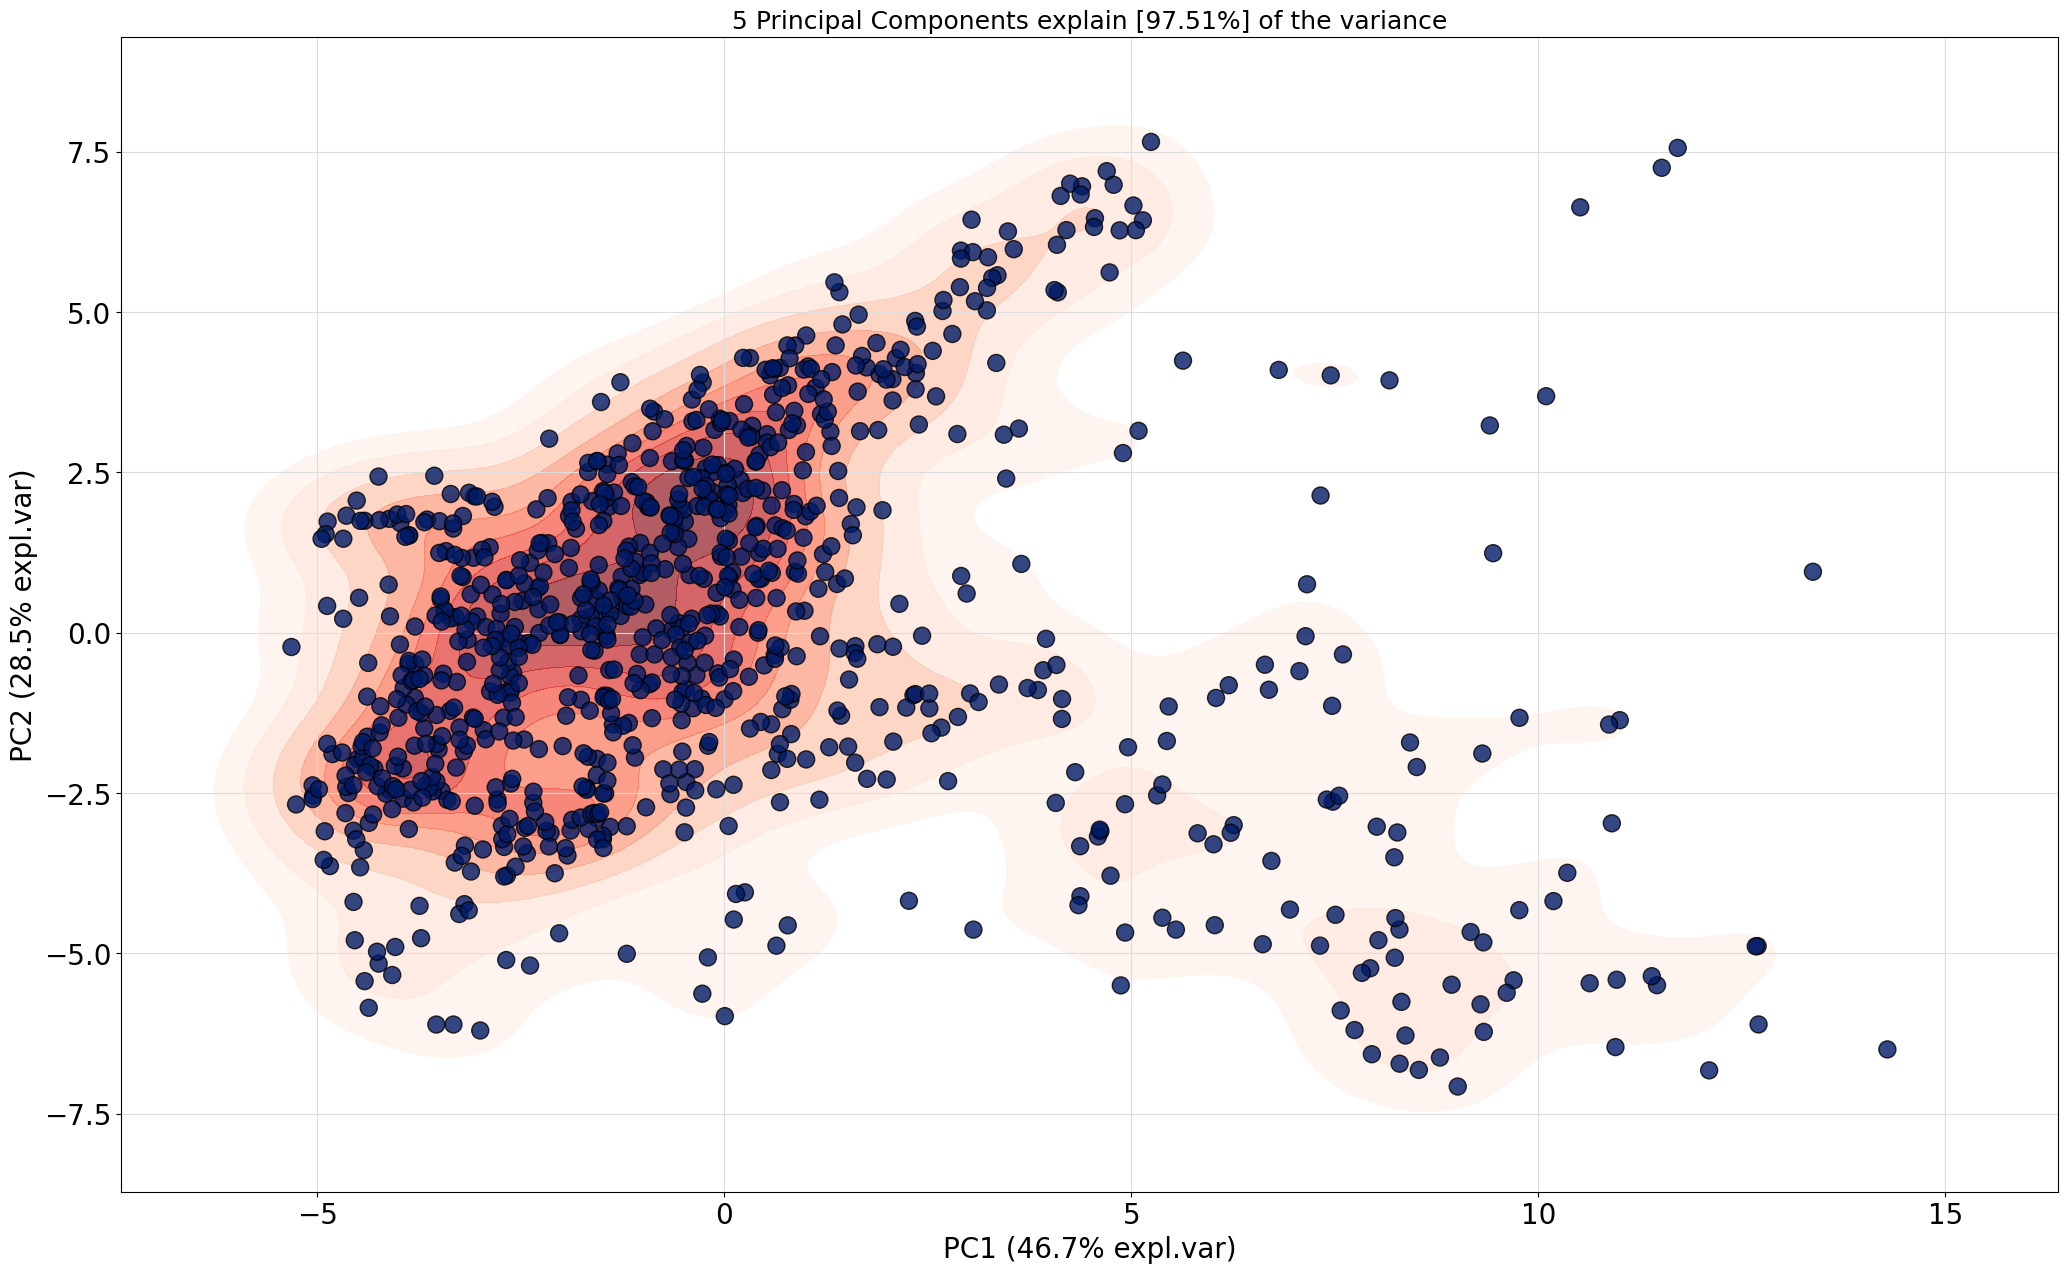

In [42]:
model.scatter(density=True)

[scatterd] >INFO> Add density layer


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.51%] of the variance'}, xlabel='PC2 (28.5% expl.var)', ylabel='PC3 (11.4% expl.var)'>)

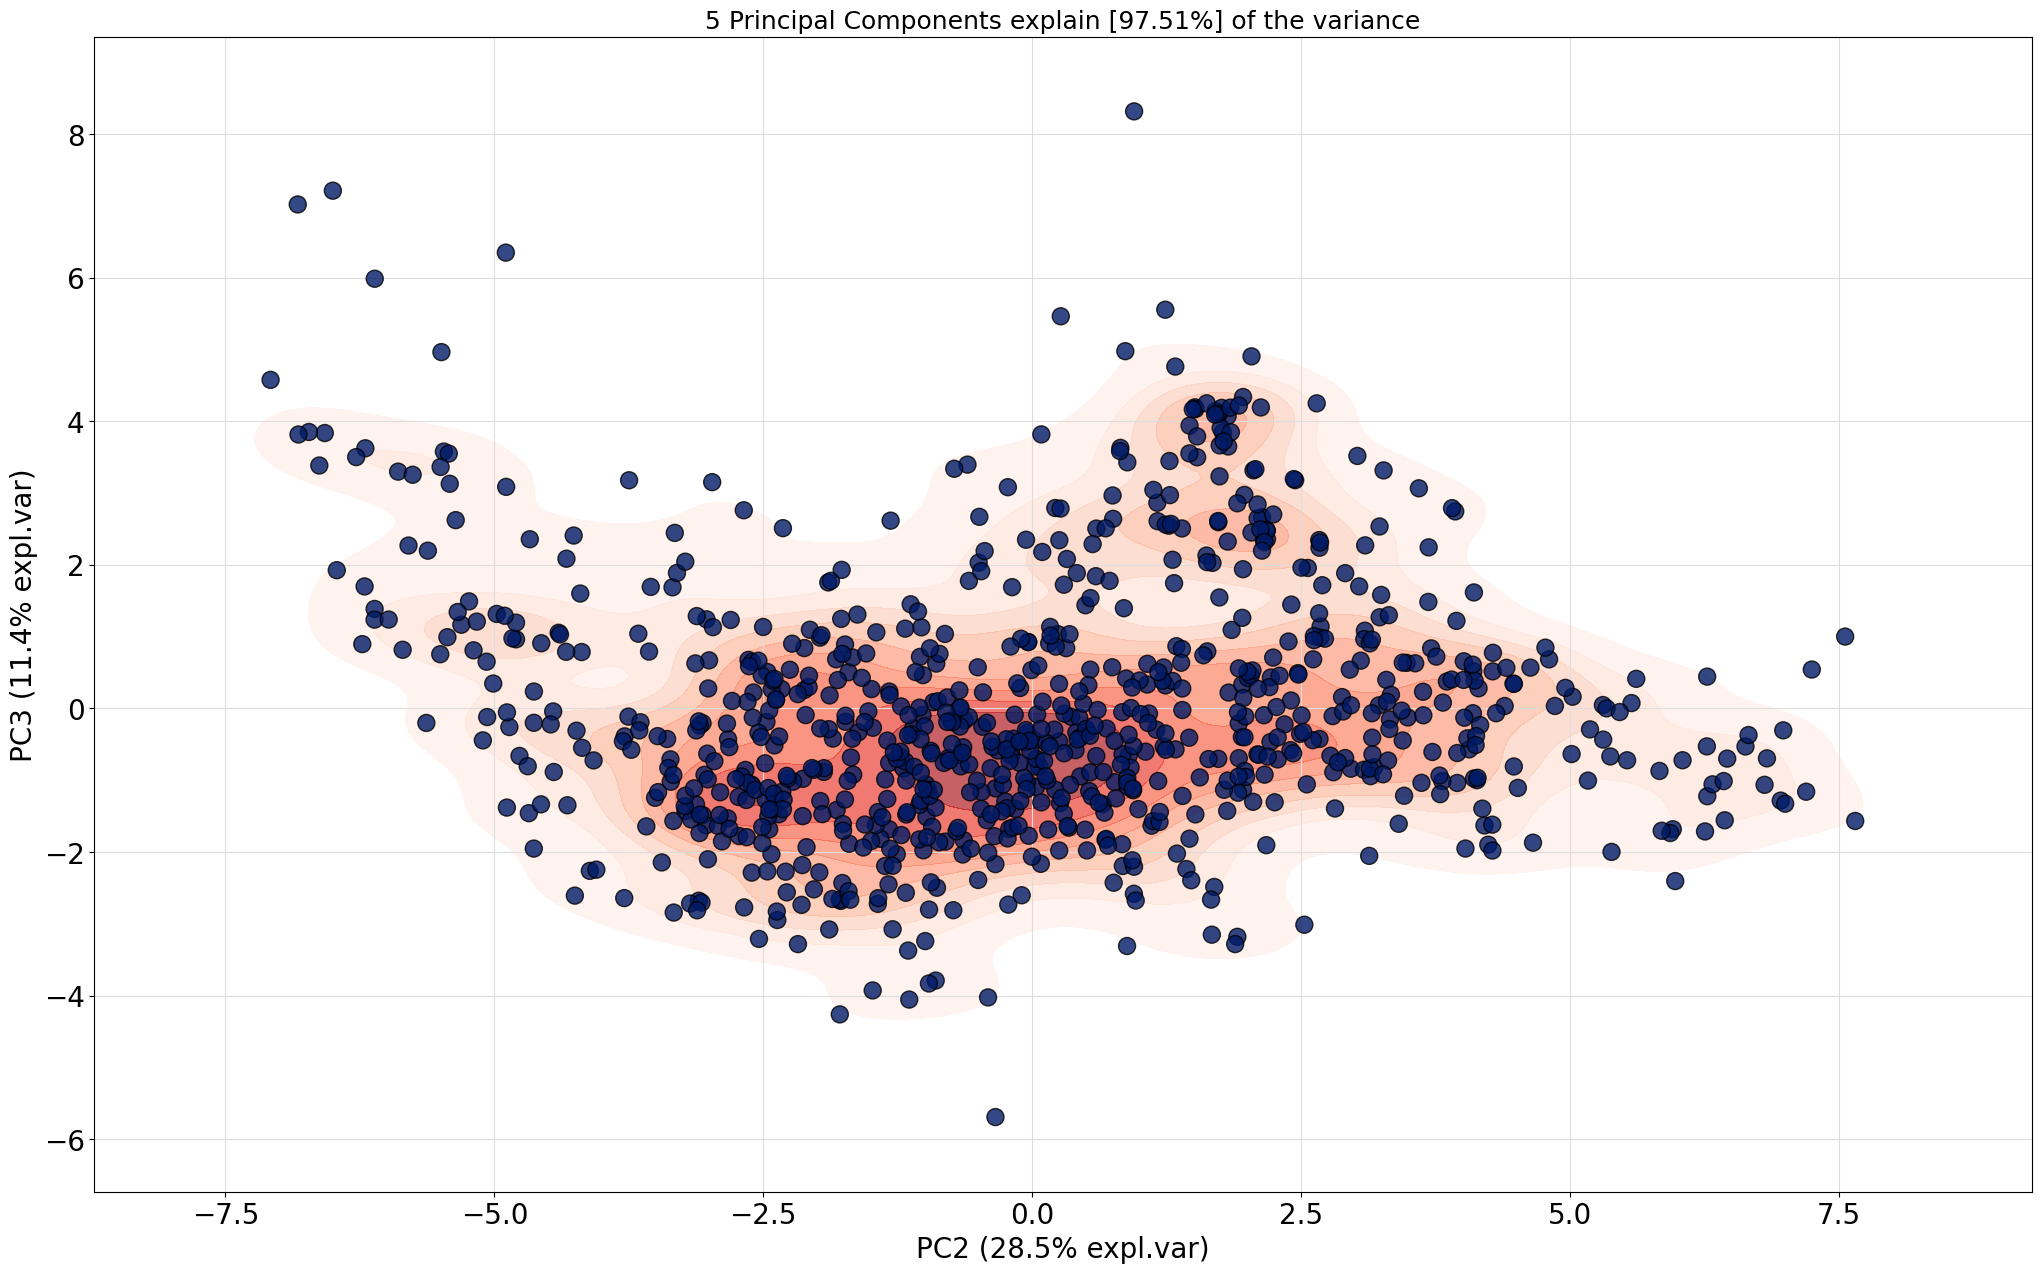

In [43]:
model.scatter(PC=[1, 2], density=True)

[scatterd] >INFO> Add density layer


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.51%] of the variance'}, xlabel='PC1 (46.7% expl.var)', ylabel='PC3 (11.4% expl.var)'>)

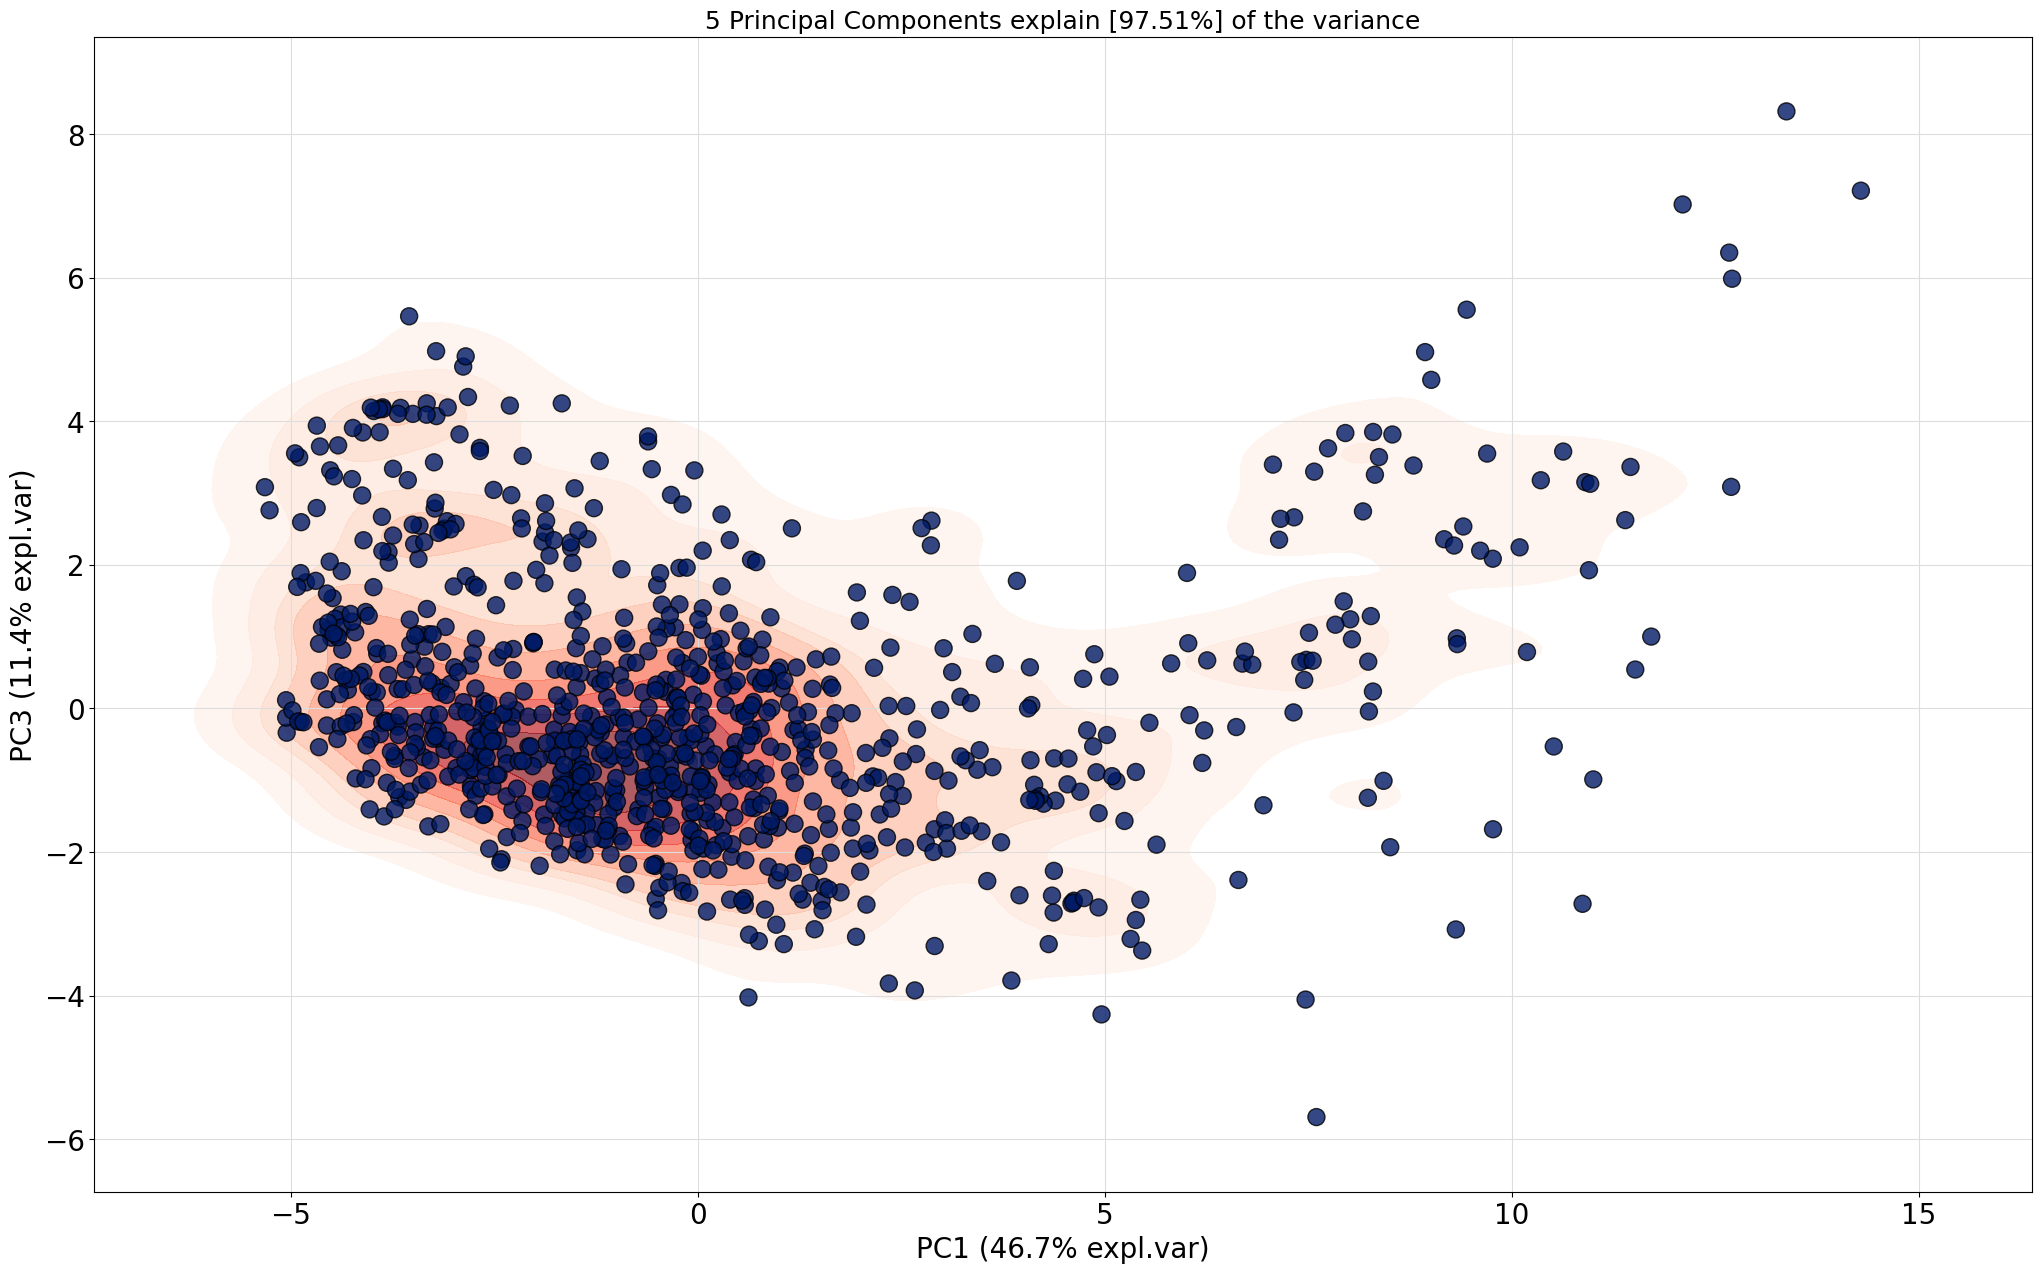

In [44]:
model.scatter(PC=[0, 2], density=True)

PCA citation: https://github.com/erdogant/pca/